In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class SIRModel:
    def __init__(self, n=1000, k=4, beta=0.25, days_inf=7):
        # Initialize ring lattice
        self.network = nx.watts_strogatz_graph(n=n, k=4, p=0, seed=None)
        self.n = n
        self.k = k
        
        # Initialize healthy community
        for node in self.network.nodes:
            self.network.nodes[node]['susceptible'] = True
            self.network.nodes[node]['infected'] = False
            self.network.nodes[node]['recovered'] = False
        
        self.susceptible = list(self.network.nodes)
        self.infected = []
        self.recovered = []
        
        # Probability of an infected person spreading the disease to a susceptible individual they contacted
        self.beta = beta
        self.gamma = 1/days_inf
        self.time = 1
        
    def initialize_epidemic(self):
        # Assign a single random node as infected and the rest as susceptiple
        patient_zero = np.random.choice(list(self.network.nodes))
        self.update_infected_susceptible(patient_zero)

    def update_infected_recovered(self, node):
        self.network.nodes[node]['recovered'] = True
        self.network.nodes[node]['infected'] = False
        self.recovered.append(node)
        self.infected.remove(node)

    def update_infected_susceptible(self, node):
        self.network.nodes[node]['susceptible'] = False
        self.network.nodes[node]['infected'] = True
        self.infected.append(node)
        self.susceptible.remove(node)
    
    def recovers(self, node):
        p = self.gamma
        recovers = np.random.choice([True, False], p=[p, (1-p)])
        
        if recovers:
            self.update_infected_recovered(node)
    
    def gets_infected(self, node):
        if self.network.nodes[node]['susceptible'] == True:
            p = self.beta
            gets_infected = np.random.choice([True, False], p=[p, (1-p)])

            if gets_infected:
                self.update_infected_susceptible(node)

    def simulate_disease_progress(self):
        for node in self.infected:
            self.recovers(node)
            
        for node in self.infected:
            for n in list(self.network.neighbors(node)):
                self.gets_infected(n)

In [7]:
pop = 5000
peak_days = []
peak_values = []
t_days = []

for e in range(100):
    model = SIRModel(n=pop, k=4, beta=0.75, days_inf=7)
    model.initialize_epidemic()
    
    peak_day = 0
    peak = 0
    
    infected = []
    susceptible = []
    recovered = []
 
    i = 0
    while i < 10000:
        if len(model.infected) == 0:
            break

        infected.append(len(model.infected))
        susceptible.append(len(model.susceptible))
        recovered.append(len(model.recovered))
        model.simulate_disease_progress()
        
        if len(model.infected) > peak:
            peak = len(model.infected)
            peak_day = i
            
        i += 1
        
    t_days.append(i)
    peak_days.append(peak_day)
    peak_values.append(peak)

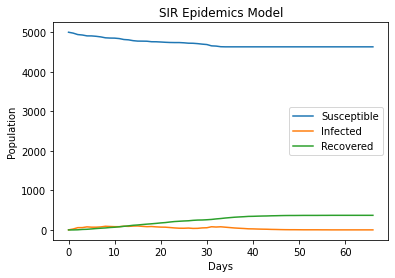

In [10]:
t = list(range(i))

plt.title("SIR Epidemics Model")
plt.xlabel("Days")
plt.ylabel("Population")
plt.plot(t, susceptible, label="Susceptible")
plt.plot(t, infected, label = "Infected")
plt.plot(t, recovered, label = "Recovered")

plt.legend()
plt.show()